In [3]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.core.display import display,HTML

from sklearn.datasets import make_circles
import tensorflow as tf

<ipython-input-2-056f7f3439b5>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(_x0,_x1,_py,cmap='coolwarm',vmin=0,vmax=1)


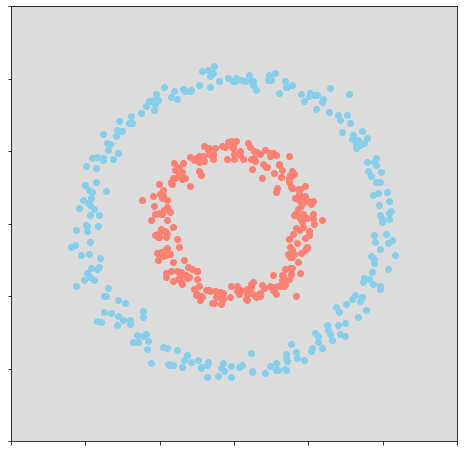

In [2]:
X,y = make_circles(n_samples=500,factor=0.5,noise=0.05)
res = 100

# Coordenadas del mapa de predicción
_x0 = np.linspace(-1.5,1.5,res)
_x1 = np.linspace(-1.5,1.5,res)

# Input con cada combo de coordenadas de predicción
_pX = np.array(np.meshgrid(_x0,_x1)).T.reshape(-1,2)

# Objeto vacio a 0.5 del mapa de predicción
_py = np.zeros((res,res))+0.5

# visualización del mapa de predicción
plt.figure(figsize=(8,8))
plt.pcolormesh(_x0,_x1,_py,cmap='coolwarm',vmin=0,vmax=1)

# visualización de la nube de datos

plt.scatter(X[y==0,0],X[y==0,1], c='skyblue')
plt.scatter(X[y==1,0],X[y==1,1], c='salmon')

plt.tick_params(labelbottom=False,labelleft=False)

(500,)

In [22]:
tf.compat.v1.disable_eager_execution()
# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.compat.v1.placeholder('float', shape=[500,2]) # ERROR LIBRERIA
iY = tf.compat.v1.placeholder('float', shape=[500,1])

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random.normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random.normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random.normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random.normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random.normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random.normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

with tf.compat.v1.Session() as sess:
  
  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.compat.v1.global_variables_initializer())
    
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
  
    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : y })
    
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0: 
      
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == y)
      
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)
      
  
# ----- CÓDIGO ANIMACIÓN ----- #

ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generando animación ---")

for fr in range(len(iPY)):
  
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos.
  plt.scatter(X[y == 0,0], X[y == 0,1], c="skyblue")
  plt.scatter(X[y == 1,0], X[y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_html5_video())

ValueError: Cannot feed value of shape (500,) for Tensor 'Placeholder_11:0', which has shape '(500, 1)'

In [24]:
import keras as kr

In [27]:
# Learning Rate
lr = 0.01
# Cantidad de neuronas por capa
nn = [2,16,8,1]
# Creamos la estructura que contendra el modelo (Secuencia de capas)
model = kr.Sequential()

# Las capas fully connected es decir cada neurona tiene una conexión con
# la capa anterior son las capas dense
# Especifica cuantas neuronas tiene y la función de activación

# Capa 1
model.add(kr.layers.Dense(nn[1],activation='relu'))

# Capa 2
model.add(kr.layers.Dense(nn[2],activation='relu'))

# Capa 3
model.add(kr.layers.Dense(nn[3],activation='sigmoid'))

In [29]:
# Compilar el modelo
model.compile(loss='mse',optimizer=kr.optimizers.SGD(lr=lr),metrics=['acc'])
# Entrenamos el modelo
model.fit(X,y,epochs=250)

Train on 500 samples
Epoch 1/250
500/500 [==============================] - 0s 32us/sample - loss: 0.2621 - acc: 0.4920
Epoch 2/250
500/500 [==============================] - 0s 34us/sample - loss: 0.2613 - acc: 0.4860
Epoch 3/250
500/500 [==============================] - 0s 32us/sample - loss: 0.2604 - acc: 0.4840
Epoch 4/250
500/500 [==============================] - 0s 32us/sample - loss: 0.2597 - acc: 0.4760
Epoch 5/250
500/500 [==============================] - 0s 38us/sample - loss: 0.2590 - acc: 0.4760
Epoch 6/250
500/500 [==============================] - 0s 30us/sample - loss: 0.2583 - acc: 0.4780
Epoch 7/250
500/500 [==============================] - 0s 34us/sample - loss: 0.2576 - acc: 0.4740
Epoch 8/250
500/500 [==============================] - 0s 32us/sample - loss: 0.2570 - acc: 0.4700
Epoch 9/250
500/500 [==============================] - 0s 30us/sample - loss: 0.2564 - acc: 0.4740
Epoch 10/250
500/500 [==============================] - 0s 30us/sample - loss: 0.2558 - 

500/500 [==============================] - 0s 24us/sample - loss: 0.2256 - acc: 0.6900
Epoch 83/250
500/500 [==============================] - 0s 30us/sample - loss: 0.2252 - acc: 0.6920
Epoch 84/250
500/500 [==============================] - 0s 28us/sample - loss: 0.2248 - acc: 0.6880
Epoch 85/250
500/500 [==============================] - 0s 28us/sample - loss: 0.2244 - acc: 0.6940
Epoch 86/250
500/500 [==============================] - 0s 30us/sample - loss: 0.2240 - acc: 0.6900
Epoch 87/250
500/500 [==============================] - 0s 26us/sample - loss: 0.2236 - acc: 0.6940
Epoch 88/250
500/500 [==============================] - 0s 28us/sample - loss: 0.2233 - acc: 0.6940
Epoch 89/250
500/500 [==============================] - 0s 28us/sample - loss: 0.2229 - acc: 0.6900
Epoch 90/250
500/500 [==============================] - 0s 26us/sample - loss: 0.2225 - acc: 0.6980
Epoch 91/250
500/500 [==============================] - 0s 26us/sample - loss: 0.2221 - acc: 0.7000
Epoch 92/250


500/500 [==============================] - 0s 20us/sample - loss: 0.1844 - acc: 0.8700
Epoch 164/250
500/500 [==============================] - 0s 24us/sample - loss: 0.1838 - acc: 0.8700
Epoch 165/250
500/500 [==============================] - 0s 20us/sample - loss: 0.1832 - acc: 0.8700
Epoch 166/250
500/500 [==============================] - 0s 22us/sample - loss: 0.1827 - acc: 0.8700
Epoch 167/250
500/500 [==============================] - 0s 22us/sample - loss: 0.1821 - acc: 0.8680
Epoch 168/250
500/500 [==============================] - 0s 24us/sample - loss: 0.1815 - acc: 0.8720
Epoch 169/250
500/500 [==============================] - 0s 22us/sample - loss: 0.1809 - acc: 0.8700
Epoch 170/250
500/500 [==============================] - 0s 24us/sample - loss: 0.1804 - acc: 0.8700
Epoch 171/250
500/500 [==============================] - 0s 20us/sample - loss: 0.1798 - acc: 0.8740
Epoch 172/250
500/500 [==============================] - 0s 18us/sample - loss: 0.1792 - acc: 0.8720
Epoc

500/500 [==============================] - 0s 24us/sample - loss: 0.1310 - acc: 0.9260
Epoch 245/250
500/500 [==============================] - 0s 22us/sample - loss: 0.1302 - acc: 0.9260
Epoch 246/250
500/500 [==============================] - 0s 24us/sample - loss: 0.1295 - acc: 0.9260
Epoch 247/250
500/500 [==============================] - 0s 22us/sample - loss: 0.1287 - acc: 0.9300
Epoch 248/250
500/500 [==============================] - 0s 18us/sample - loss: 0.1279 - acc: 0.9320
Epoch 249/250
500/500 [==============================] - 0s 20us/sample - loss: 0.1271 - acc: 0.9340
Epoch 250/250
500/500 [==============================] - 0s 24us/sample - loss: 0.1264 - acc: 0.9360


In [32]:
import sklearn as sk
import sklearn.neural_network

lr = 0.01
nn=[2,16,8,1]

# Existen tipos de modelos como MLPRegressor, BernoulliRBM MLPClassifier
# multilayer_perceptron y rbm
model = sk.neural_network.MLPRegressor(solver='sgd',
                                        learning_rate_init = lr,
                                        hidden_layer_sizes=nn[1:],
                                        verbose = True,
                                       n_iter_no_change = 1000)

model.fit(X,y)

Iteration 1, loss = 0.11727375
Iteration 2, loss = 0.11471359
Iteration 3, loss = 0.11366473
Iteration 4, loss = 0.11350769
Iteration 5, loss = 0.11289917
Iteration 6, loss = 0.11218308
Iteration 7, loss = 0.11174366
Iteration 8, loss = 0.11151826
Iteration 9, loss = 0.11119335
Iteration 10, loss = 0.11090988
Iteration 11, loss = 0.11064010
Iteration 12, loss = 0.11036638
Iteration 13, loss = 0.11008500
Iteration 14, loss = 0.10981310
Iteration 15, loss = 0.10951827
Iteration 16, loss = 0.10926085
Iteration 17, loss = 0.10896523
Iteration 18, loss = 0.10872172
Iteration 19, loss = 0.10836639
Iteration 20, loss = 0.10810402
Iteration 21, loss = 0.10779290
Iteration 22, loss = 0.10753148
Iteration 23, loss = 0.10721913
Iteration 24, loss = 0.10692843
Iteration 25, loss = 0.10665264
Iteration 26, loss = 0.10634779
Iteration 27, loss = 0.10604689
Iteration 28, loss = 0.10573479
Iteration 29, loss = 0.10540350
Iteration 30, loss = 0.10513545
Iteration 31, loss = 0.10482147
Iteration 32, los

C:\Users\GAMER\anaconda3\envs\dataAnalyst\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=[16, 8, 1], learning_rate_init=0.01,
             n_iter_no_change=1000, solver='sgd', verbose=True)